# Data preparation

In [ ]:
# The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

# *   Age: displays the age of the individual
# *   Sex: displays the gender of the individual using the following format 
      ## > *   1 = male
      ## > *   0 = female
# *   Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
      ## > *   1 = typical angina
      ## > *   2 = atypical angina
      ## > *   3 = non — anginal pain
      ## > *   4 = asymptotic
# *   Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
# *   Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
# *   Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
      ## > *   If fasting blood sugar > 120mg/dl then : 1 (true)
      ## > *   else : 0 (false)
# *   Resting ECG : displays resting electrocardiographic results
      ## > *   0 = normal
      ## > *   1 = having ST-T wave abnormality
      ## > *   2 = left ventricular hyperthrophy
# *   Max heart rate achieved : displays the max heart rate achieved by an individual.
# *   Exercise induced angina :
      ## > *   1 = yes
      ## > *   0 = no
# *   ST depression induced by exercise relative to rest: displays the value which is an integer or float.
# *   Peak exercise ST segment : 
      ## > *   1 = upsloping
      ## > *   2 = flat
      ## > *   3 = downsloping
# *   Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
# *   Thal : displays the thalassemia:
      ## > *   3 = normal
      ## > *   6 = fixed defect
      ## > *   7 = reversible defect
# *   Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not:
      ## > *   0 = absence, 
      ## > *   1, 2, 3, 4 = present.

In [1]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/AbdullahAlrhmoun/Heart-disease-prediction-model/master/processed.cleveland.data.csv'
headernames = ['age', 'sex', 'chest_pain', 'blood_press', 'chol','blood_sugar', 'ecg', 
                    'max_rate','exc_ang', 'st_depress','slope', 'no_vess', 'thal', 'status']
df = pd.read_csv(url, names=headernames, skipinitialspace=True)
df.shape

(303, 14)

In [2]:
#@title Checking data
# First 5 rows
df.head()

,age,sex,chest_pain,blood_press,chol,blood_sugar,ecg,max_rate,exc_ang,st_depress,slope,no_vess,thal,status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Checking last 5 rows
df.tail()

,age,sex,chest_pain,blood_press,chol,blood_sugar,ecg,max_rate,exc_ang,st_depress,slope,no_vess,thal,status
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   chest_pain   303 non-null    float64
 3   blood_press  303 non-null    float64
 4   chol         303 non-null    float64
 5   blood_sugar  303 non-null    float64
 6   ecg          303 non-null    float64
 7   max_rate     303 non-null    float64
 8   exc_ang      303 non-null    float64
 9   st_depress   303 non-null    float64
 10  slope        303 non-null    float64
 11  no_vess      303 non-null    object 
 12  thal         303 non-null    object 
 13  status       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
# Converting certain floats to int

# Columns that can be reccasted to int (mostly categorical variables, but int for now)
columns = ['sex', 'chest_pain', 'blood_sugar', 'ecg', 'exc_ang', 'slope']

# Reccasting floats to ints
for i in columns:
    df[i] = df[i].apply(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    int64  
 2   chest_pain   303 non-null    int64  
 3   blood_press  303 non-null    float64
 4   chol         303 non-null    float64
 5   blood_sugar  303 non-null    int64  
 6   ecg          303 non-null    int64  
 7   max_rate     303 non-null    float64
 8   exc_ang      303 non-null    int64  
 9   st_depress   303 non-null    float64
 10  slope        303 non-null    int64  
 11  no_vess      303 non-null    object 
 12  thal         303 non-null    object 
 13  status       303 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 33.3+ KB


In [6]:
# Number of unique train observartions:
df.nunique()

age             41
sex              2
chest_pain       4
blood_press     50
chol           152
blood_sugar      2
ecg              3
max_rate        91
exc_ang          2
st_depress      40
slope            3
no_vess          5
thal             4
status           5
dtype: int64

In [8]:
# Merging status = 1, 2, 3, and 4 into a single level status = 1...
df['status'] = df['status'].replace([1, 2, 3, 4], 1)

In [9]:
# Checking status (class) balance
df['status'].value_counts()

0    164
1    139
Name: status, dtype: int64

In [10]:
#@title Data cleaning

# Changing ? (missing values) values with NaN
df.replace('?', np.NaN, inplace=True)

df.tail()

,age,sex,chest_pain,blood_press,chol,blood_sugar,ecg,max_rate,exc_ang,st_depress,slope,no_vess,thal,status
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7.0,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7.0,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7.0,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3.0,1
302,38.0,1,3,138.0,175.0,0,0,173.0,0,0.0,1,NaN,3.0,0


In [11]:
# Checking NaN values
df.isnull().sum()

age            0
sex            0
chest_pain     0
blood_press    0
chol           0
blood_sugar    0
ecg            0
max_rate       0
exc_ang        0
st_depress     0
slope          0
no_vess        4
thal           2
status         0
dtype: int64

In [13]:
# Raplacing missing values

# When categorical variables have a small number of missing values, the missing values
  ## are replaced by the 'majority class' (the dominant value).

# Numeric variables have a small number of missing values: 
# (Alternative 1) The missing values can be replaced by the average value of the variable
  ## on a subset of instances that are the closest (the most similar)
  ## to the instance(s) with the missing value.
## If the variable is normaly distributed (e.g., shapiro.test()) -> the mean is used;
  ## otherwise, the median is used.
## In the simplest case, the entire range of instances is used.

# (Alternative 2) Regression can be used to PREDICT the missing values, 
  ## and replace the missing values with the predicted ones.

# (Alternative 3) The missing values can be replaced with non-NaN values from a subset of SIMILAR  
  ## (similar in terms of having (nearly) the same values of other relevant features). 
## The replacements typically go one by one, so the number of NaNs should be very small.

# Variables with many missing values and/or missing values that are difficult to replace
  ## Such cases require a more sophisticated imputation, i.e., prediction of good substitutes 
  ## for the missing values.
## The other option is to create some new variables ("proxies") and do some feature engineering.

# Checking normality
from scipy.stats import shapiro

# Columns with missing values
columns = ['no_vess', 'thal']

# Converting to float (direct converting to int may result in errors)
df['no_vess'] = df['no_vess'].astype('float')
df['thal'] = df['thal'].astype('float')

# Temporary dataframe without NaN
df_temp = df.dropna()

# Replacing missing values with the mean or meadian value of the variable depending on the normality test
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df_temp[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))

    # Replacing NaN    
    if p > 0.05:
        df[i].fillna(df[i].mean(), inplace=True)
        print('\nSample looks Gaussian\n')
    else:
        df[i].fillna(df[i].median(), inplace=True)
        print('\nSample does not look Gaussian\n')

no_vess

(W)= 7.146570e-01,
 p = 2.083332e-22

Sample does not look Gaussian

thal

(W)= 6.565768e-01,
 p = 2.705231e-24

Sample does not look Gaussian



In [14]:
# Converting to int
df['no_vess'] = df['no_vess'].astype('int')
df['thal'] = df['thal'].astype('int')

In [15]:
df.tail()

,age,sex,chest_pain,blood_press,chol,blood_sugar,ecg,max_rate,exc_ang,st_depress,slope,no_vess,thal,status
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1
302,38.0,1,3,138.0,175.0,0,0,173.0,0,0.0,1,0,3,0


In [16]:
df.describe()

,age,sex,chest_pain,blood_press,chol,blood_sugar,ecg,max_rate,exc_ang,st_depress,slope,no_vess,thal,status
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [17]:
#@title Splitting data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Spliting x axis and y axis
y = df['status']
x = df.drop(['status'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((61, 13), (61,))

In [18]:
# Oversampling is used to balance the unbalanced dataset.

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")


Training target statistics: Counter({1: 129, 0: 129})


In [19]:
# Concating x_train and x_train for a visualization
df_train_balanced = pd.concat([x_train, y_train], axis=1)

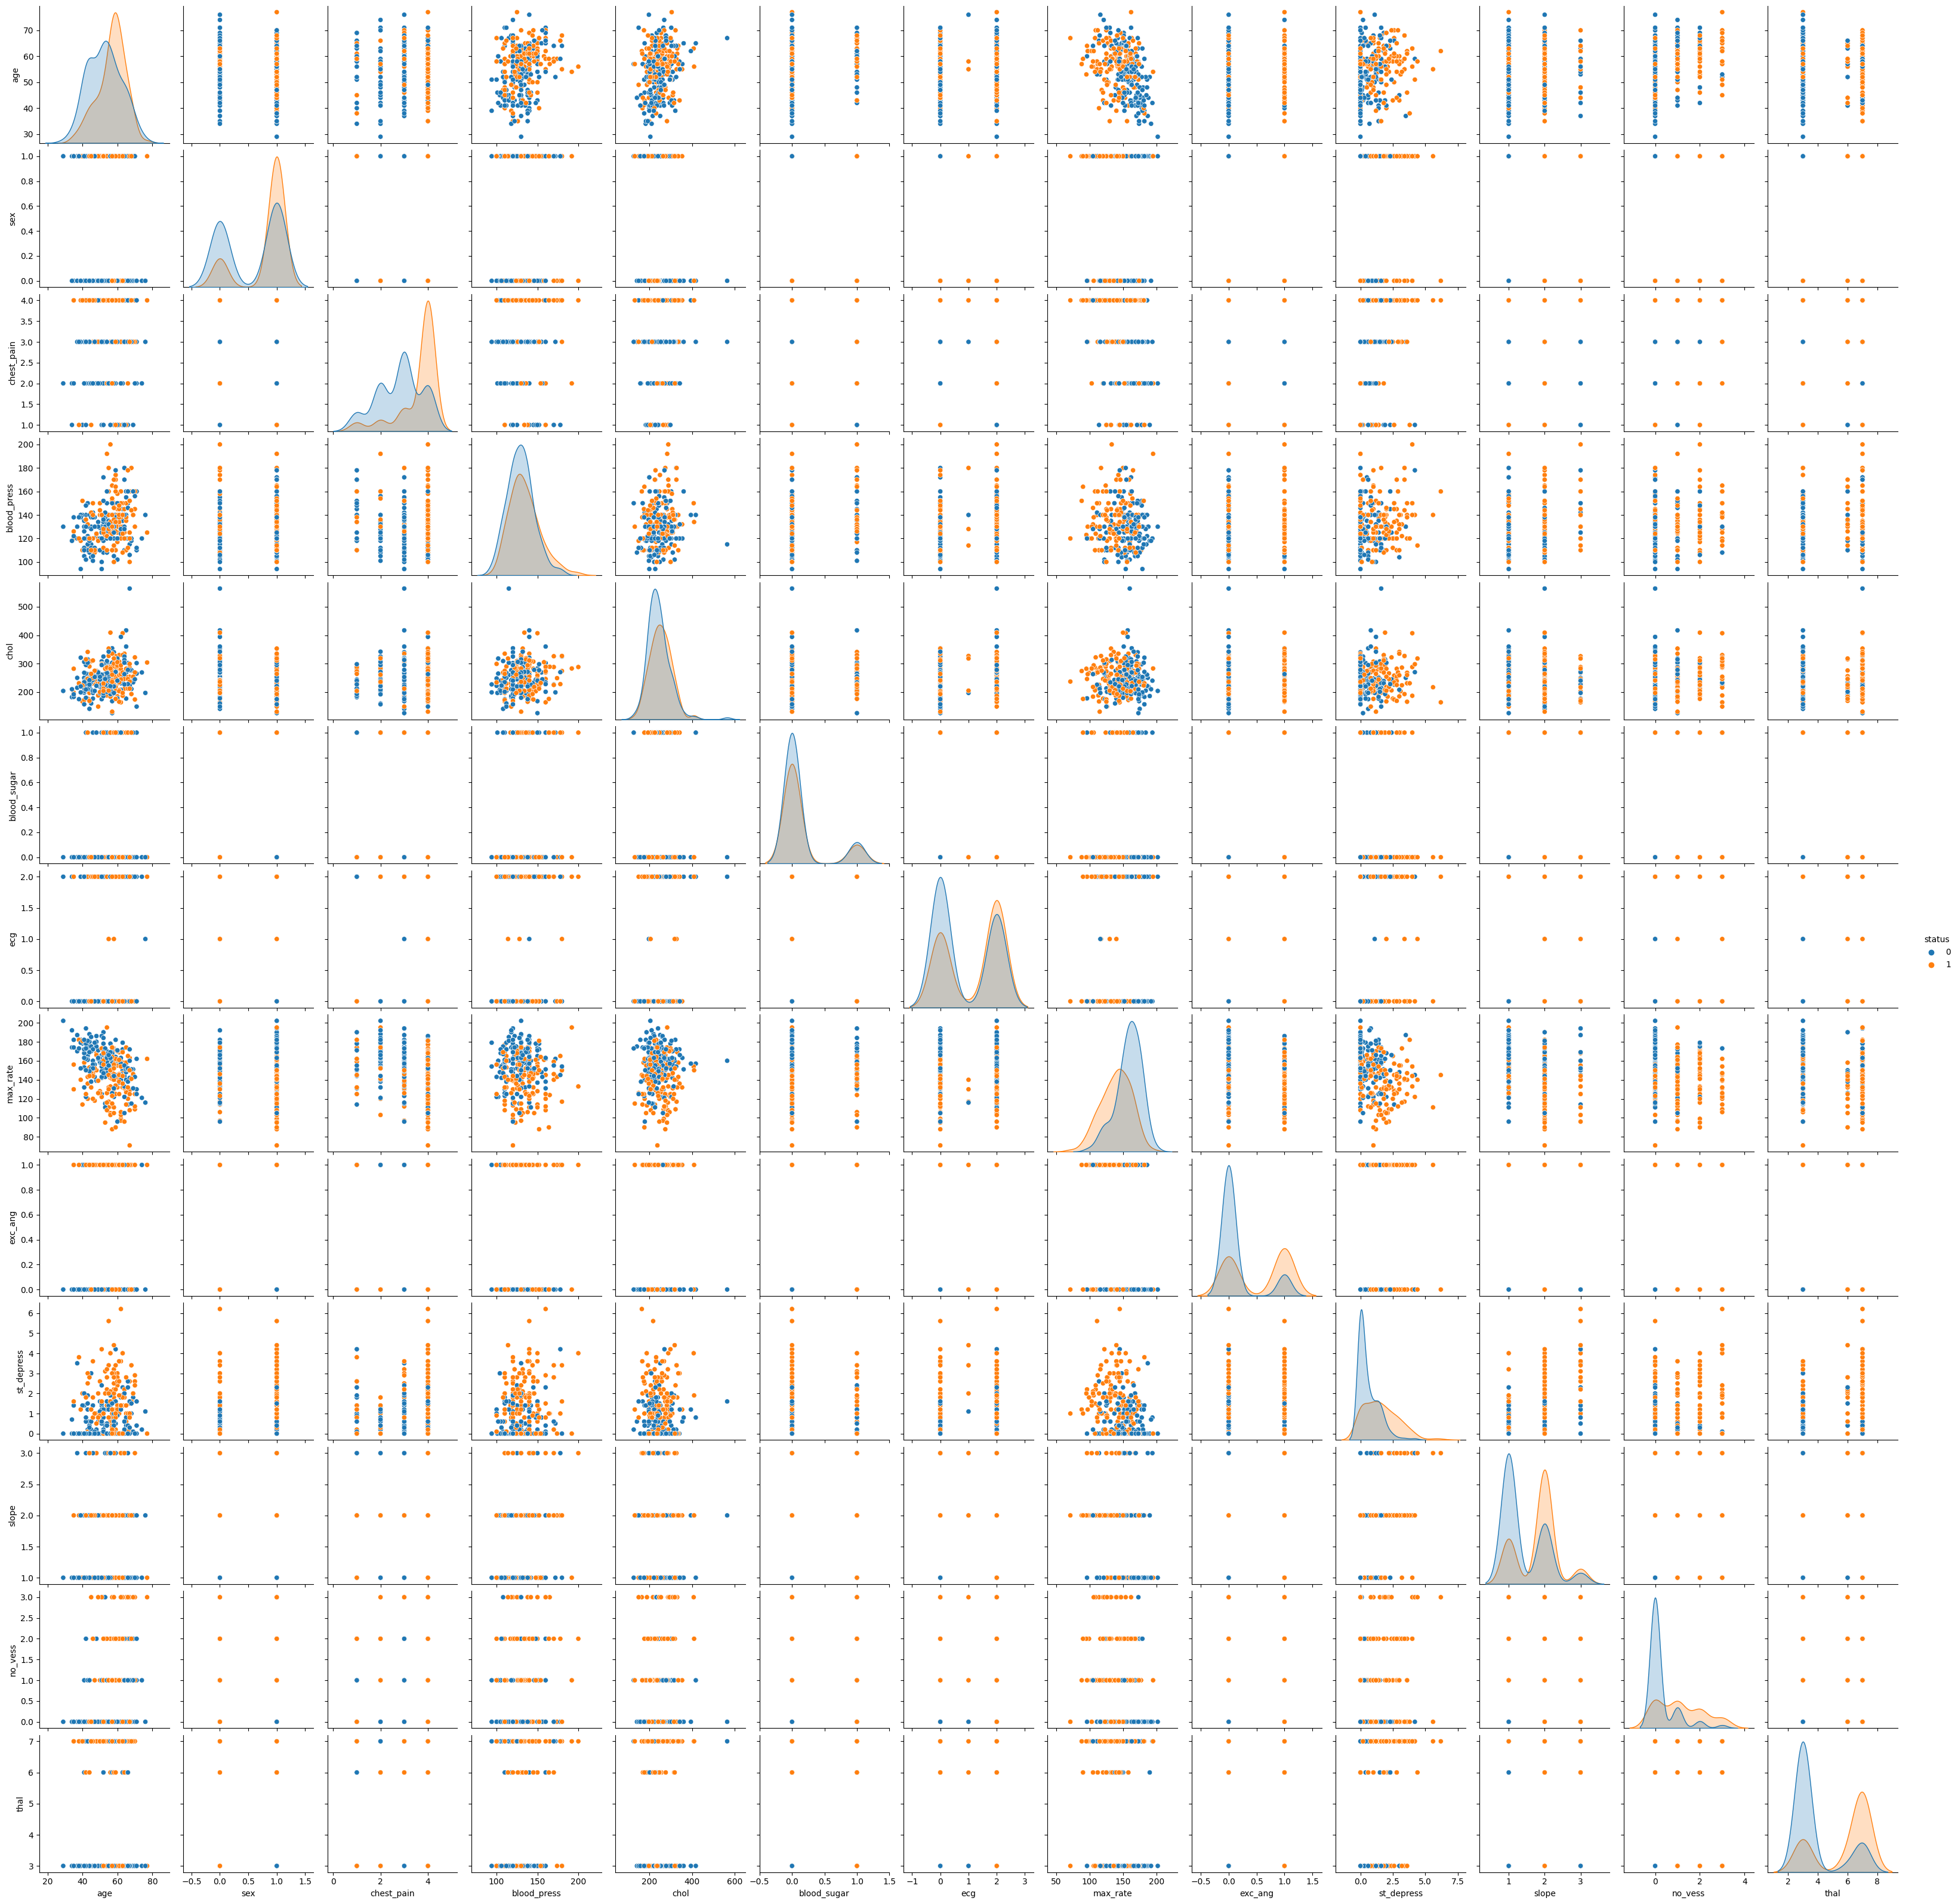

In [21]:
#@title Data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Investigating separation between classes
sns.pairplot(data=df, hue='status')
plt.show()


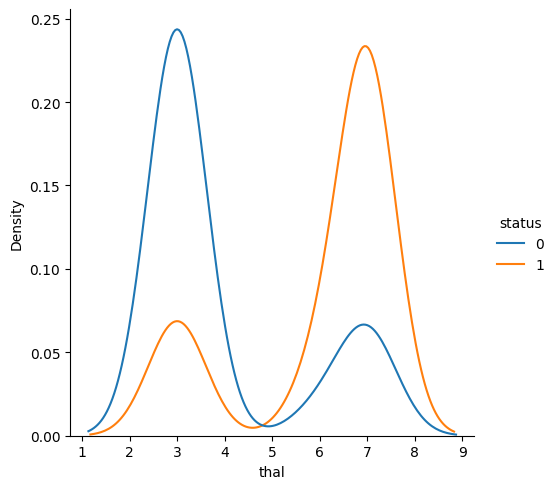

In [22]:
# Displots to see where are most separations in data between classes
sns.displot(df_train_balanced, x="thal", hue="status", kind="kde")

# Decision Tree Classifier



In [23]:
#@title Decision Tree 1 - Random parameters

# Initializing Decision Tree with some parameters
 ## random_state − int,represents the seed of the pseudo random number generated which is used while shuffling the data. 
 ## criterion − string, default= “gini” and "entropy" are supported; It represents the function to measure the quality of a split. 
 ## splitter − string, default= “best” and "random" are supported.
 ## max_depth − int or None, optional default=None; the maximum depth of the tree 
 ## min_samples_split − int, float, optional default=2  
 ## min_samples_leaf − int, float, optional default=1; the minimum number of samples required to be at a leaf node
# https://scikit-learn.org/stable/modules/tree.html
dtc1 = DecisionTreeClassifier(random_state = 0, criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)

# Fitting the model with default parameters
dtc1 = dtc1.fit(x_train,y_train)

In [24]:
#@title Decision Tree 1 Visualization
from sklearn import tree

# Print text representation
text_representation = tree.export_text(dtc1)
print(text_representation)

|--- feature_12 <= 5.99
|   |--- feature_8 <= 0.56
|   |   |--- feature_11 <= 0.72
|   |   |   |--- class: 0
|   |   |--- feature_11 >  0.72
|   |   |   |--- feature_2 <= 3.02
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  3.02
|   |   |   |   |--- class: 1
|   |--- feature_8 >  0.56
|   |   |--- feature_2 <= 3.17
|   |   |   |--- class: 0
|   |   |--- feature_2 >  3.17
|   |   |   |--- class: 1
|--- feature_12 >  5.99
|   |--- feature_2 <= 2.12
|   |   |--- feature_4 <= 216.94
|   |   |   |--- class: 0
|   |   |--- feature_4 >  216.94
|   |   |   |--- class: 1
|   |--- feature_2 >  2.12
|   |   |--- feature_11 <= 0.44
|   |   |   |--- feature_9 <= 0.68
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  0.68
|   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.44
|   |   |   |--- class: 1



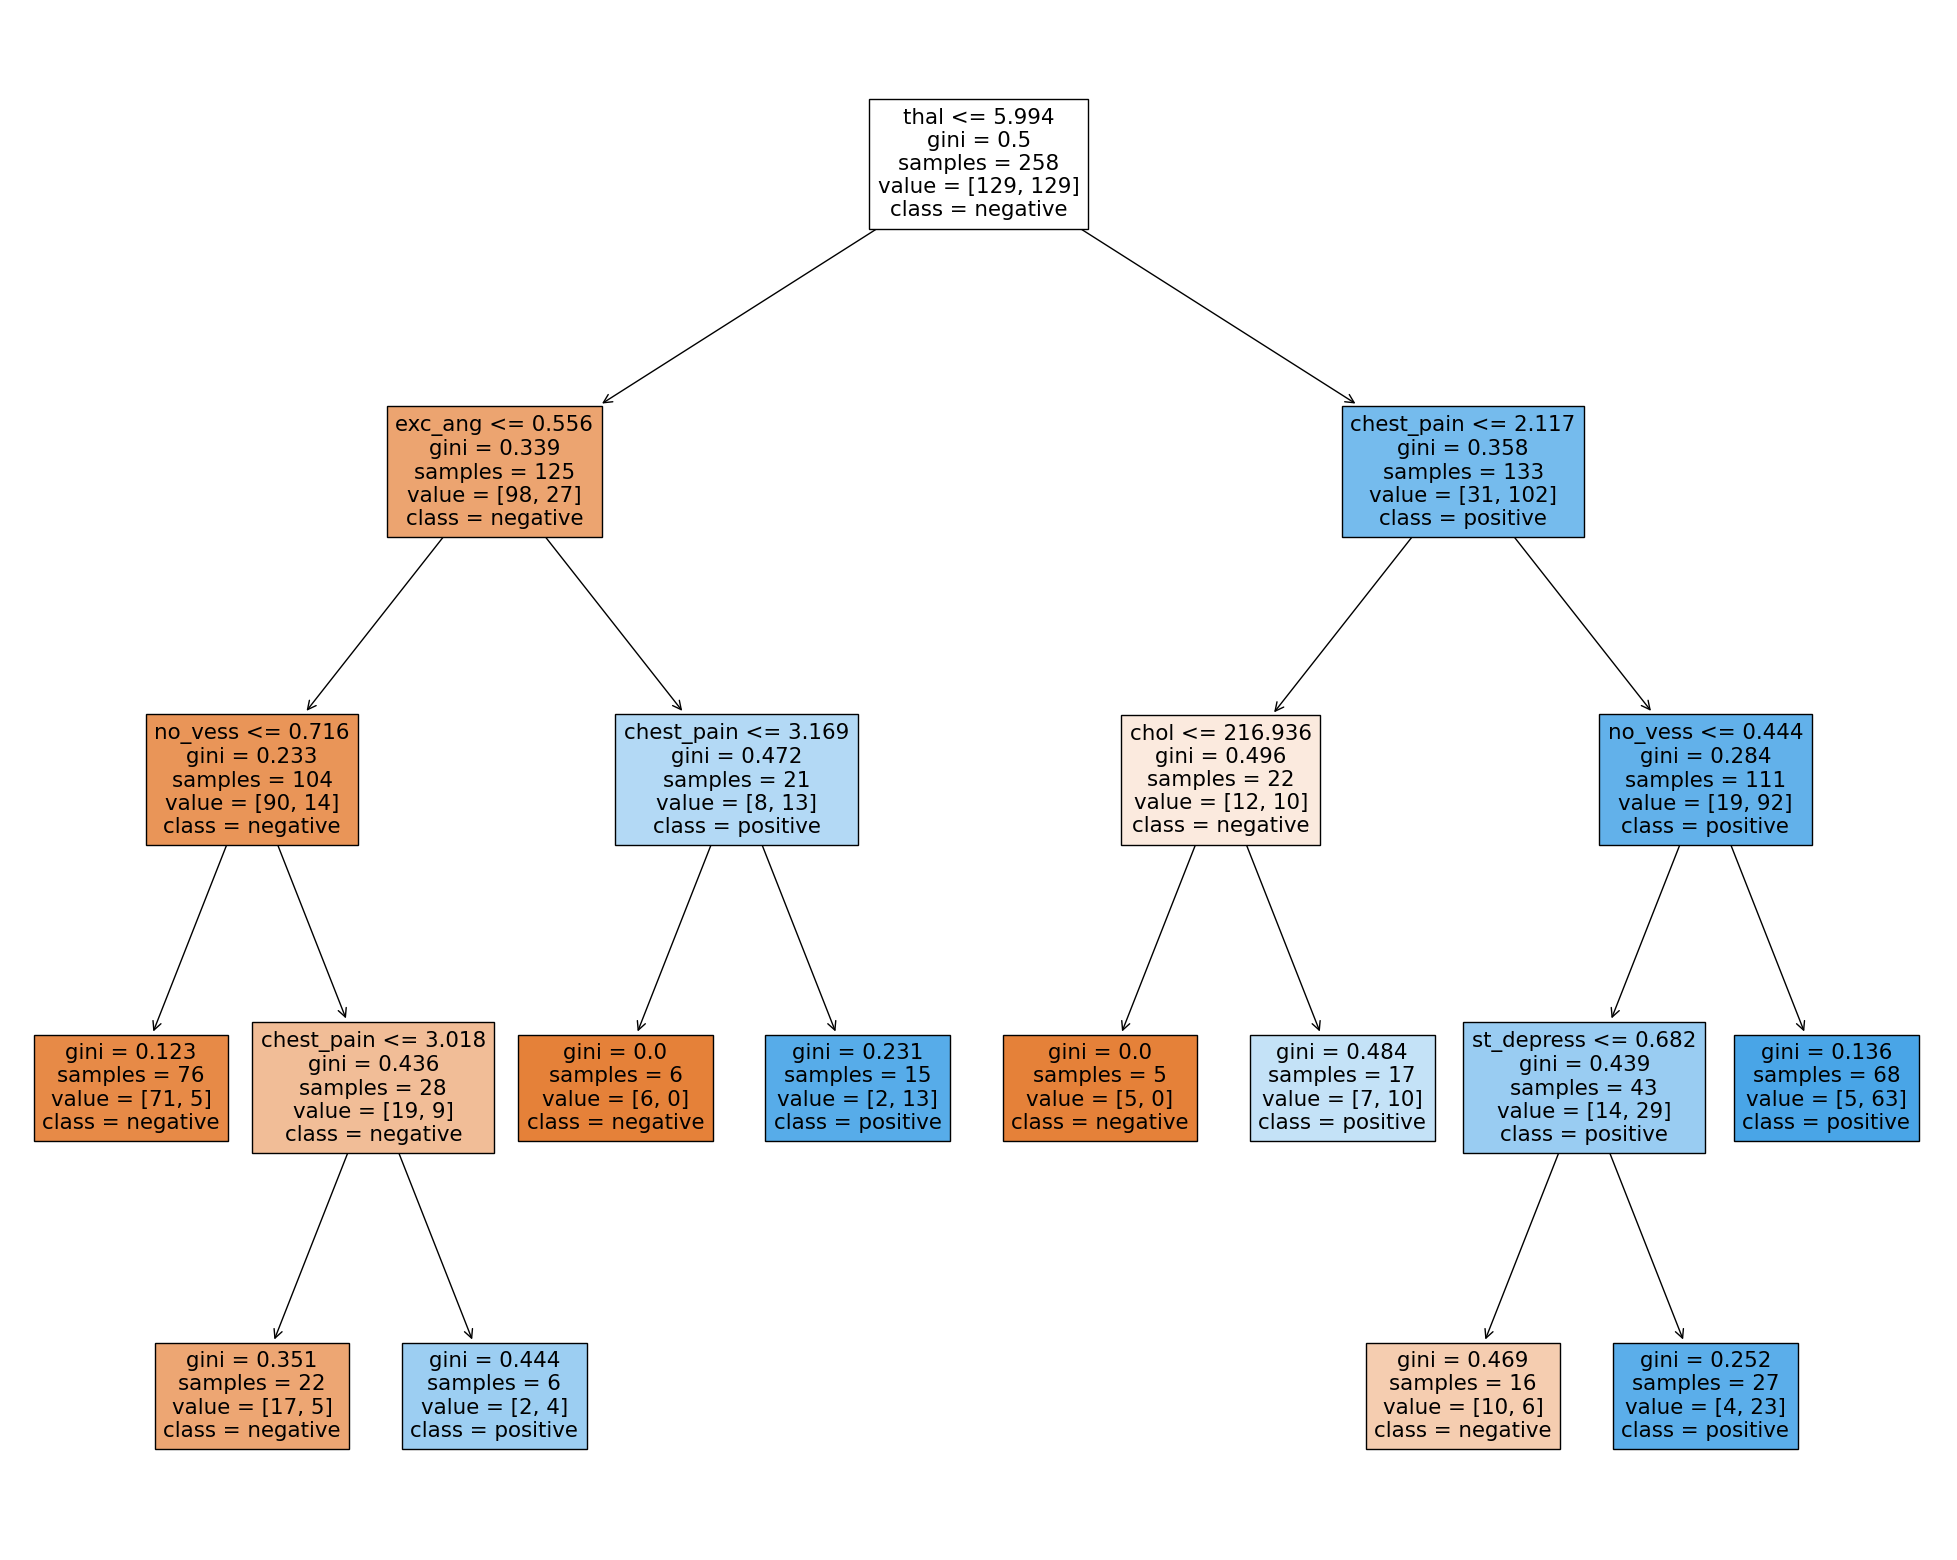

In [25]:
from matplotlib import pyplot as plt

# Plotting a tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc1, 
                   feature_names= ['age', 'ex', 'chest_pain', 'blood_press', 'chol','blood_sugar', 'ecg', 
                    'max_rate','exc_ang', 'st_depress','slope', 'no_vess', 'thal', 'status'], 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [40]:
# Getting feature importances
dtc1_imp_features = dtc1.feature_importances_
print(dtc1_imp_features)

[0.         0.         0.18116084 0.         0.03614095 0.
 0.         0.         0.1108434  0.0617566  0.         0.08139018
 0.52870803]


<BarContainer object of 13 artists>

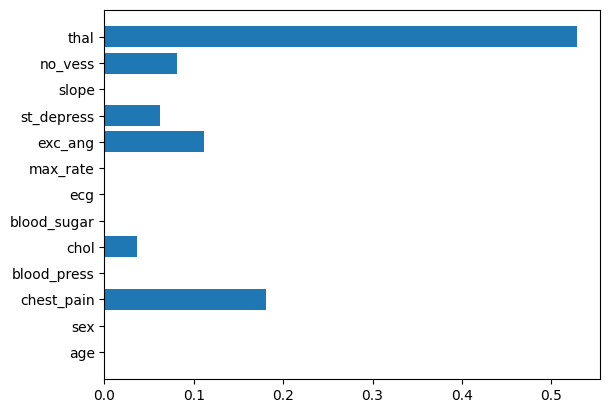

In [41]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(dtc1.feature_names_in_, dtc1.feature_importances_)

In [28]:
#@title Decision Treee 1 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred1 = dtc1.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[27,  8],
       [ 7, 19]])

In [29]:
# Compute evaluation metrics:
# accuracy = (TP + TN) / N
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# F1 = (2 * precision * recall) / (precision + recall)
# Note: precision and recall are inversely proportional to each other.

# Accuracy
dtc1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
dtc1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
dtc1_recall = metrics.recall_score(y_test, y_pred1)

# F1
dtc1_f1 = metrics.f1_score(y_test, y_pred1)

print("DTC1 accuracy: ", dtc1_accuracy,
      "\nDTC1 precision: ", dtc1_precision,
      "\nDTC1 recall: ", dtc1_recall,
      "\nDTC1 F1: ", dtc1_f1)

DTC1 accuracy:  0.7540983606557377 
DTC1 precision:  0.7037037037037037 
DTC1 recall:  0.7307692307692307 
DTC1 F1:  0.7169811320754716


In [30]:
#@title Decision Tree 2 - Default parameters

# The default values for the parameters controlling the size of the trees
# (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees
# which can potentially be very large on some data sets. 

# Initializing Decision Tree with default parameters
dtc2 = DecisionTreeClassifier(random_state = 0)

# Fitting the model with default parameters
dtc2 = dtc2.fit(x_train,y_train)

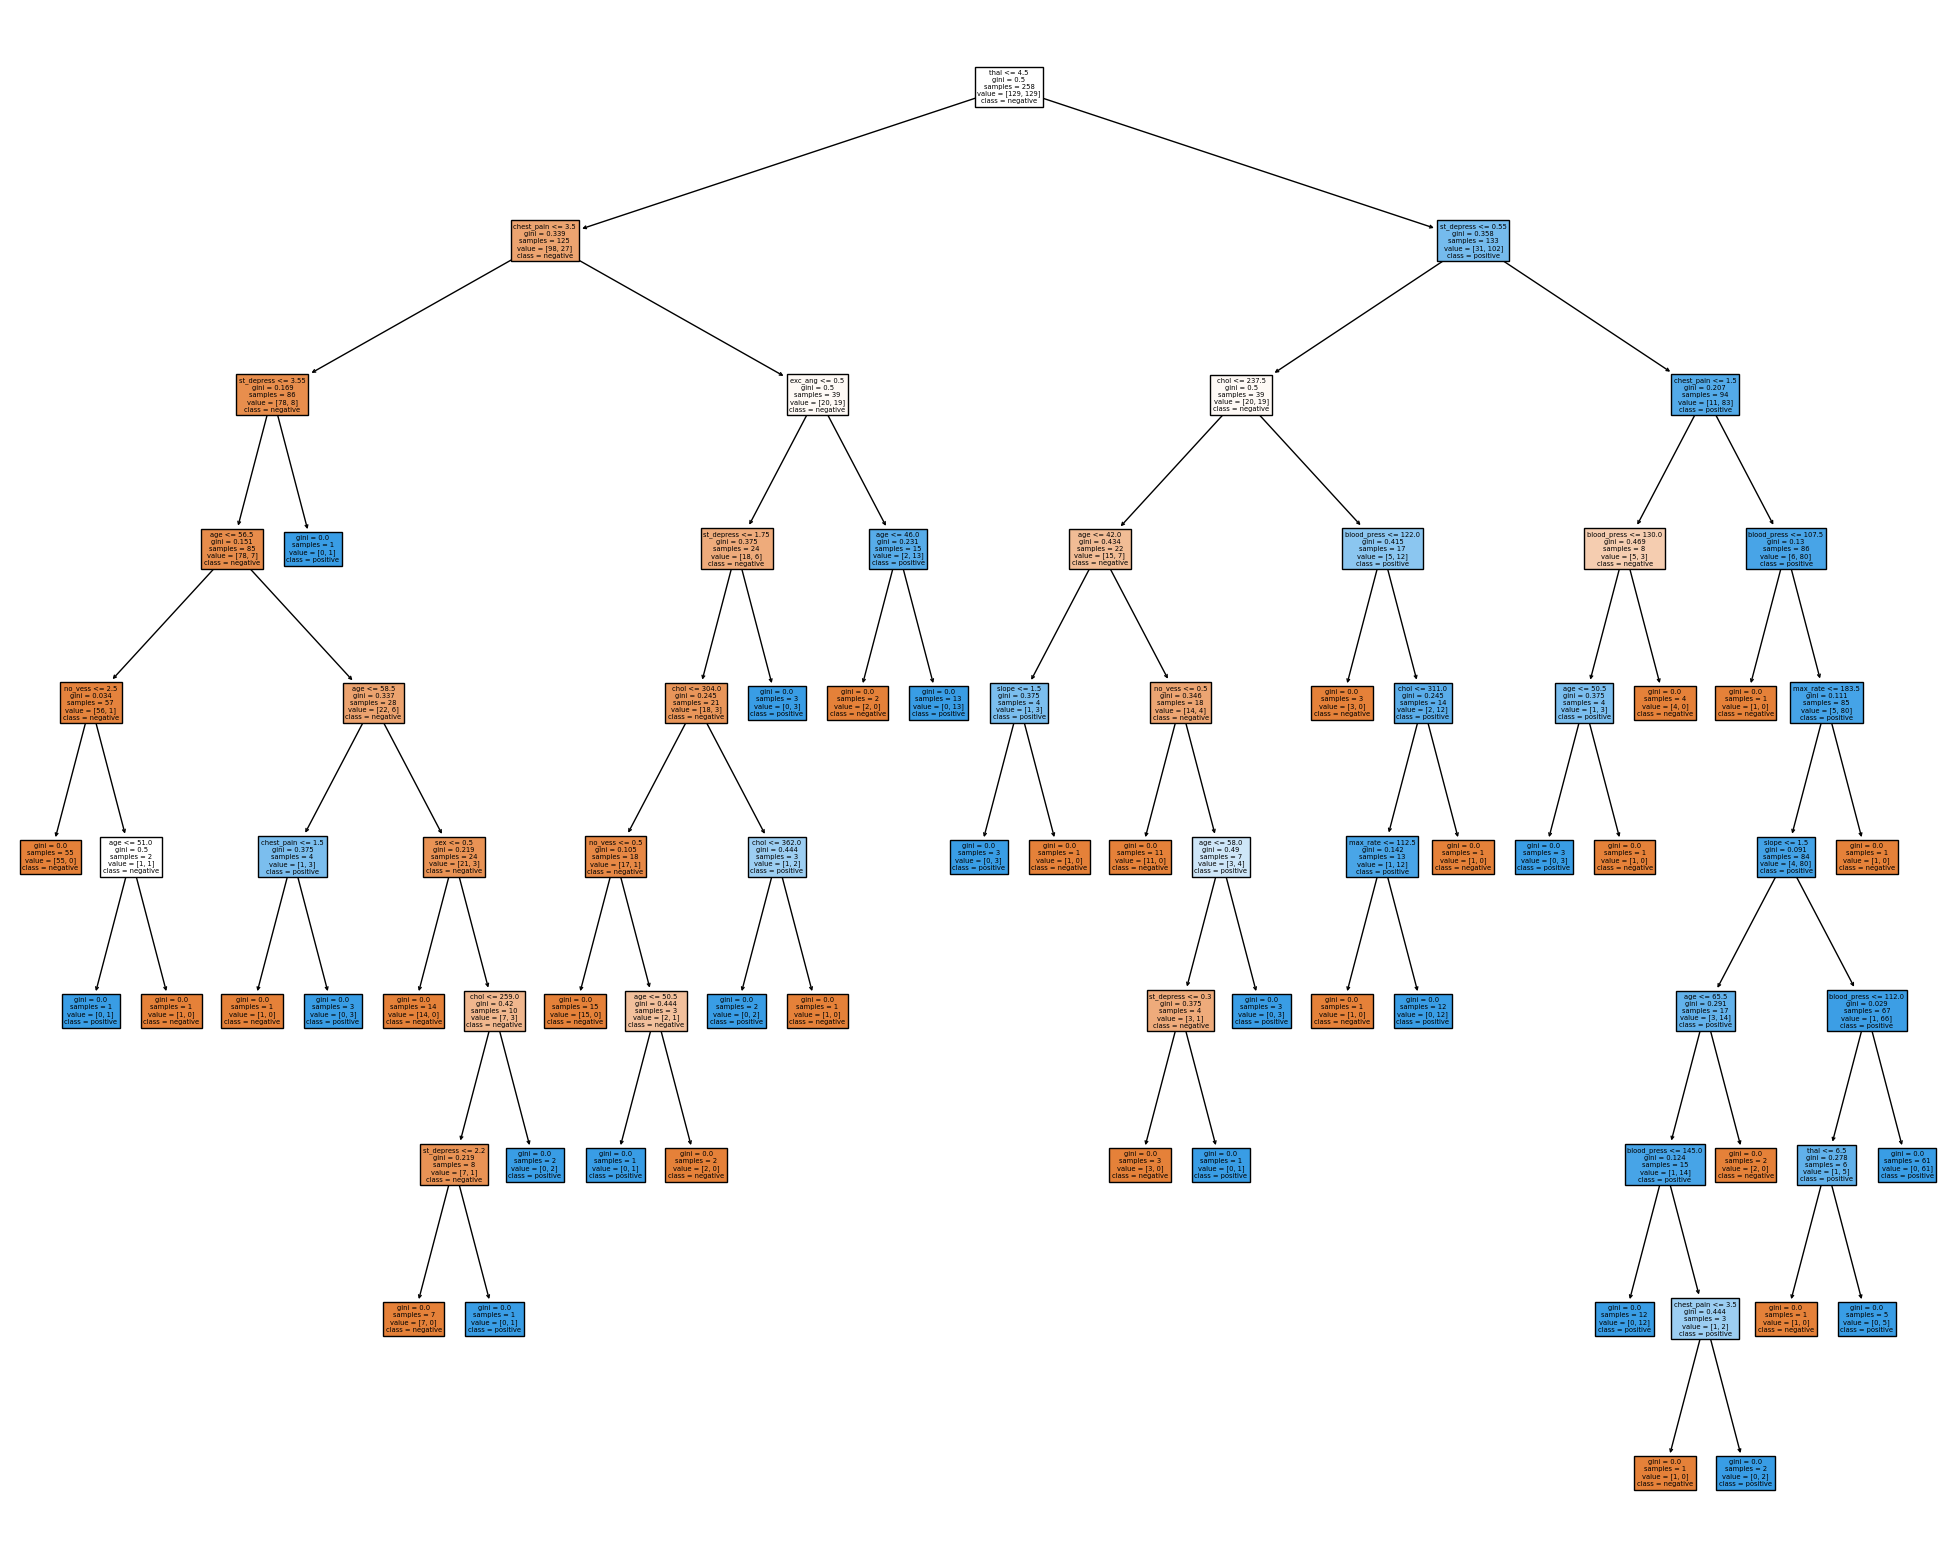

In [31]:
#@title Decision Tree 2 Visualization
from matplotlib import pyplot as plt
from sklearn import tree

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc2, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [32]:
#@title Decision Treee 2 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred2 = dtc2.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[26,  9],
       [ 5, 21]])

In [33]:
# Accuracy
dtc2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
dtc2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
dtc2_recall = metrics.recall_score(y_test, y_pred2)

# F1
dtc2_f1 = metrics.f1_score(y_test, y_pred2)

print("DTC2 accuracy: ", dtc2_accuracy,
      "\nDTC2 precision: ", dtc2_precision,
      "\nDTC2 recall: ", dtc2_recall,
      "\nDTC2 F1: ", dtc2_f1)

DTC2 accuracy:  0.7704918032786885 
DTC2 precision:  0.7 
DTC2 recall:  0.8076923076923077 
DTC2 F1:  0.75


In [34]:
#@title Decision Tree 3 - Huperparameters tuning
from sklearn.model_selection import GridSearchCV

# A dictionary of multiple possible values for parameters (hyperparameter space)
# Parameters for tuning
params = {'max_depth': [6,8,10,12,14],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4,5,6],
         'max_leaf_nodes': [4,6,8,10]}

# Initializing Decision Tree with default parameters
clf = DecisionTreeClassifier()

# The GridSearchCV is the process of performing hyperparameter tuning in order to
  ## determine the optimal values for a given model. 
# GridSearchCV tries all the combinations of the values passed in the dictionary
  ## and evaluates the model for each combination using the Cross-Validation method
# Cross-validation is a statistical method used to estimate the performance (e.g., accuracy)
  ## of machine learning models. It is used to protect against overfitting in a predictive model, 
  ## particularly in a case where the amount of data may be limited. The cross-validation algorithm
  ## makes a fixed number of folds (or partitions) of the data, runs the analysis on each fold,
  ## and then averages the overall error estimate.
# https://www.mygreatlearning.com/blog/cross-validation/
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv = gcv.fit(x_train,y_train)

In [36]:
#@title Decision Tree 3 Evaluation
from sklearn.metrics import confusion_matrix

# Gettting the best estimator from GridSearchCV
dtc3 = gcv.best_estimator_

# Fitting the model
dtc3 = dtc3.fit(x_train,y_train)

# Predicting a class / outcome using test data
y_pred3 = dtc3.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[29,  6],
       [12, 14]])

In [37]:
# Accuracy
dtc3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
dtc3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
dtc3_recall = metrics.recall_score(y_test, y_pred3)

# F1
dtc3_f1 = metrics.f1_score(y_test, y_pred3)

print("DTC3 accuracy: ", dtc3_accuracy,
      "\nDTC3 precision: ", dtc3_precision,
      "\nDTC3 recall: ", dtc3_recall,
      "\nDTC3 F1: ", dtc3_f1)

DTC3 accuracy:  0.7049180327868853 
DTC3 precision:  0.7 
DTC3 recall:  0.5384615384615384 
DTC3 F1:  0.608695652173913


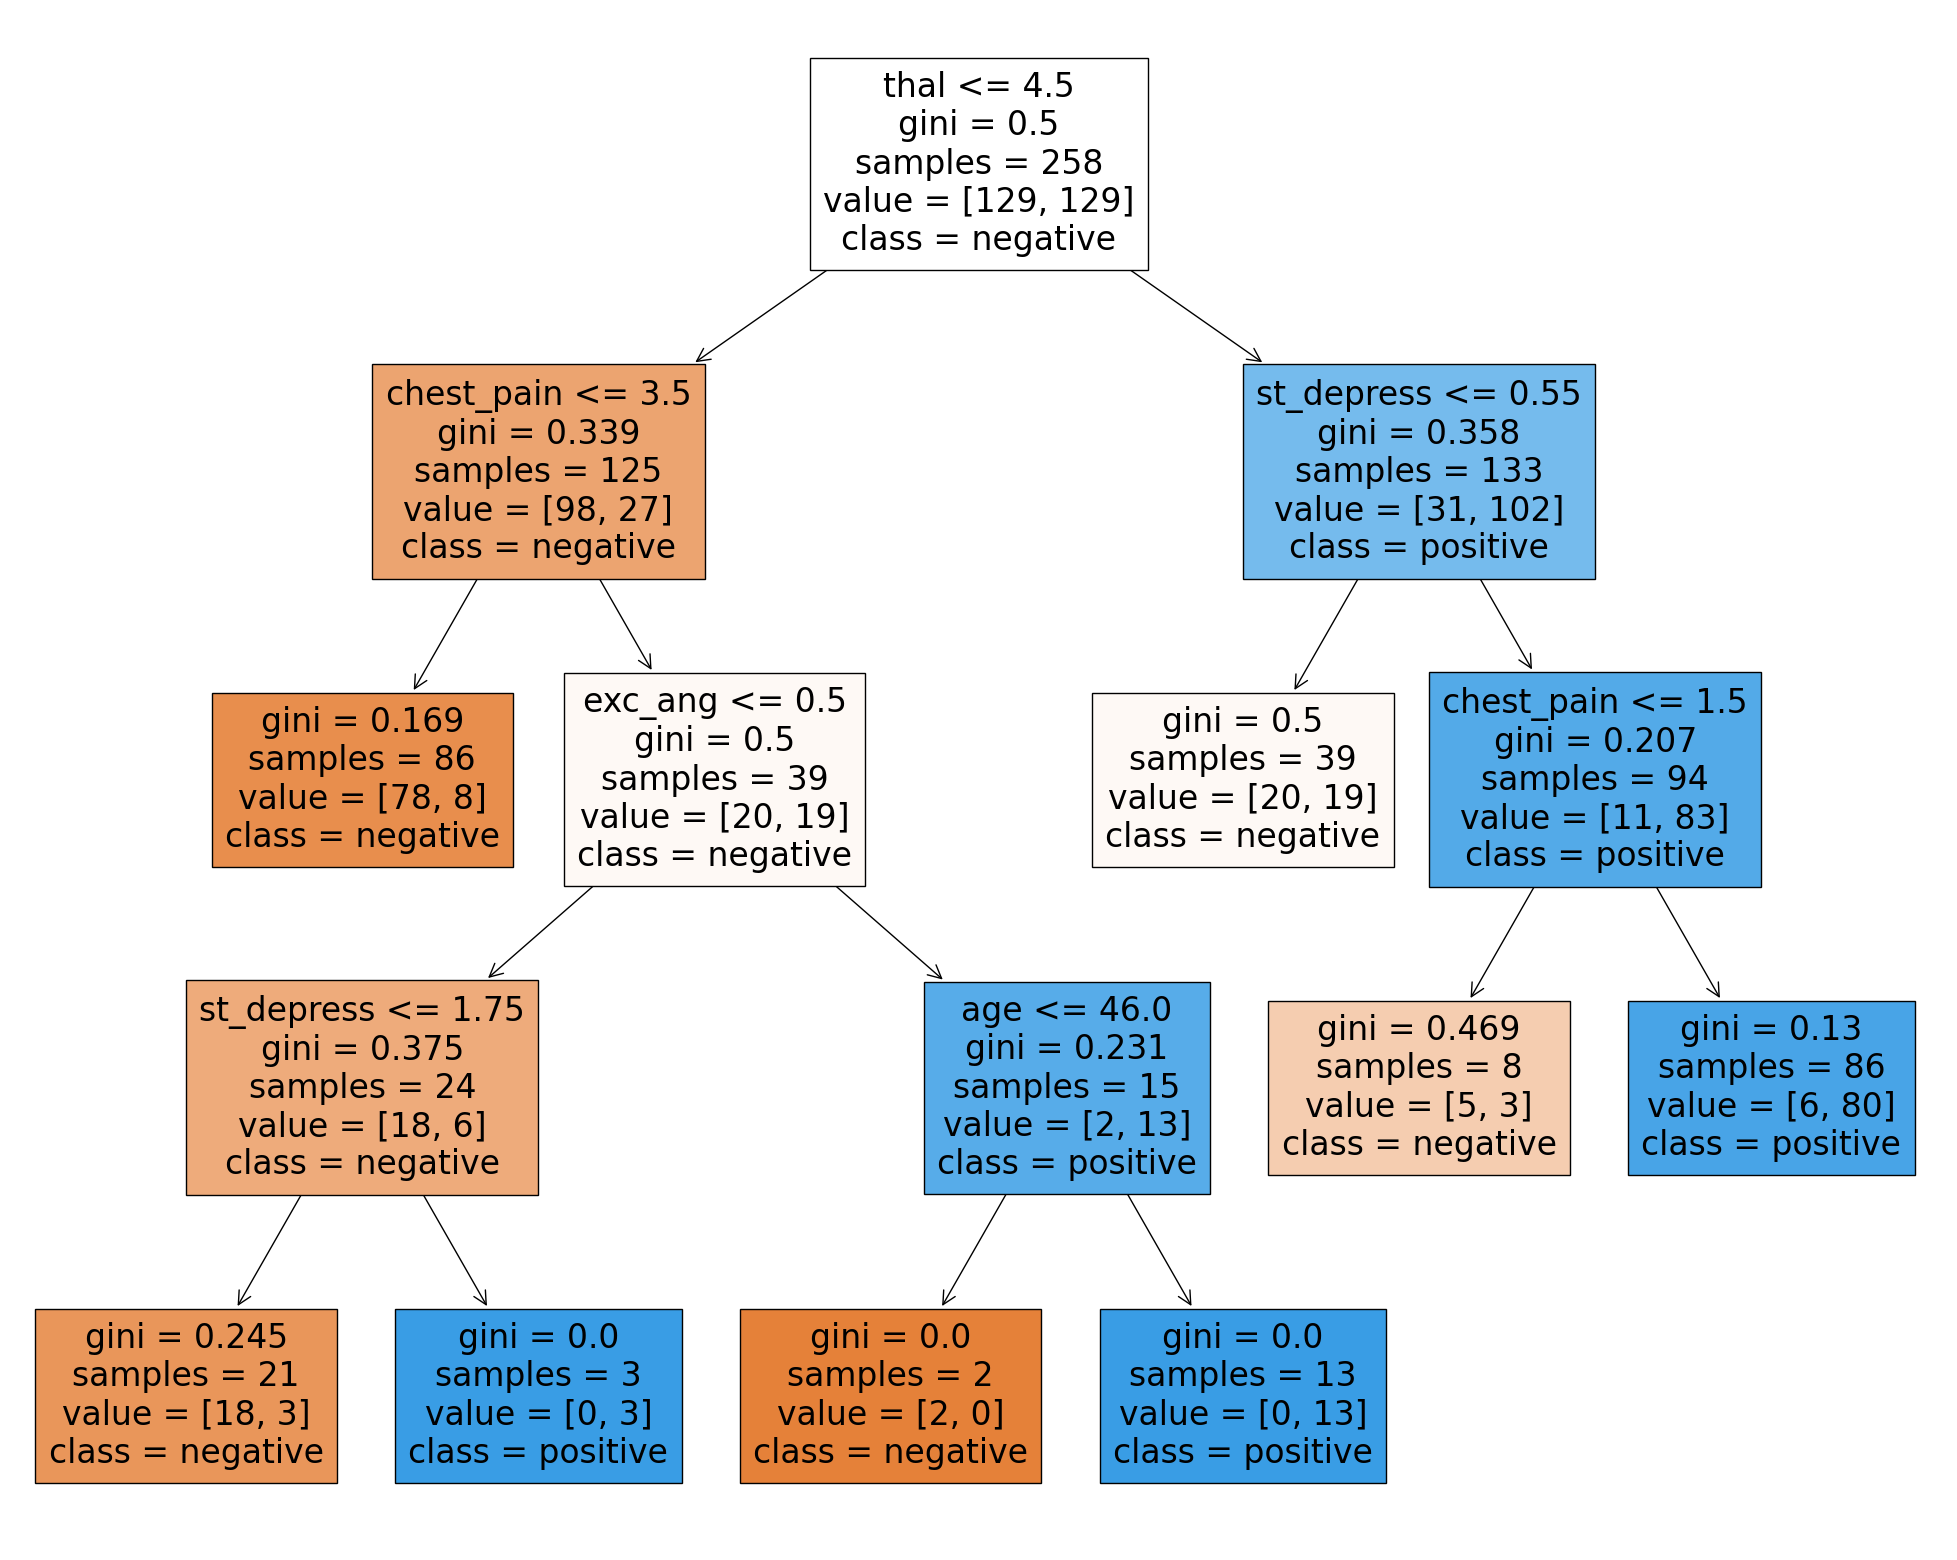

In [38]:
#@title Decision Tree 3 Visualization

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc3, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [42]:
# Getting feature importances
dtc3_imp_features = dtc3.feature_importances_
print(dtc3_imp_features)

[0.04625581 0.         0.17145694 0.         0.         0.
 0.         0.         0.09367485 0.16669842 0.         0.
 0.52191398]


<BarContainer object of 13 artists>

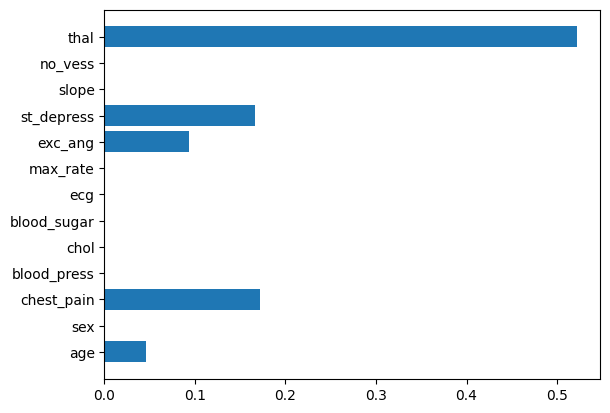

In [43]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(dtc1.feature_names_in_, dtc3.feature_importances_)

In [44]:
#@title Decision Tree 4 - Cost complexity pruning
# The pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
# Greater values of ccp_alpha increase the number of nodes pruned.

# Cost complexity pruning is about finding the right parameter for ccp_alpha. 
# It gets the ccp_alpha values for a tree and checks the impurity with the pruned trees.

path = dtc2.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00361757 0.00366064 0.00380797 0.00381812 0.00516796
 0.00581395 0.00581395 0.00581395 0.00581395 0.00664452 0.00678295
 0.00678295 0.00709881 0.00744432 0.00747508 0.0074893  0.00872093
 0.00894745 0.01262239 0.01343669 0.01495017 0.01749125 0.02721129
 0.0323147  0.03347349 0.15160902]


In [45]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(x_train, y_train)
    clfs.append(clf)

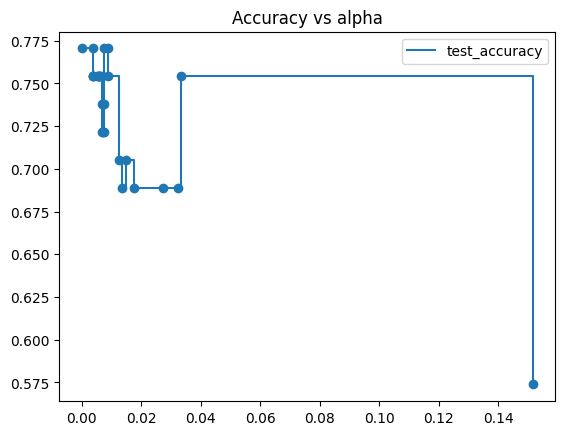

In [46]:
# Calculating and ploting accuracy vs alpha
from sklearn.metrics import accuracy_score

test_acc = []
for c in clfs:
    y_test_pred = c.predict(x_test)
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [47]:
# Reading alpha for max accuracy
max_y = max(test_acc)  # Find the maximum y value
max_x = ccp_alphas[test_acc.index(max_y)]  # Find the x value corresponding to the maximum y value
print(max_x, max_y)

0.0 0.7704918032786885


In [48]:
#@title Decision Tree 4 Evaluation

# Initializing Decision Tree
dtc4 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0)

# Fitting the model
dtc4 = dtc4.fit(x_train,y_train)

# Predicting the output/class
y_pred4 = dtc4.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred4)

array([[26,  9],
       [ 5, 21]])

In [49]:
# Accuracy
dtc4_accuracy = metrics.accuracy_score(y_test, y_pred4)

# Precision
dtc4_precision = metrics.precision_score(y_test, y_pred4)

# Recall
dtc4_recall = metrics.recall_score(y_test, y_pred4)

# F1
dtc4_f1 = metrics.f1_score(y_test, y_pred4)

print("DTC1 accuracy: ", dtc4_accuracy,
      "\nDTC1 precision: ", dtc4_precision,
      "\nDTC1 recall: ", dtc4_recall,
      "\nDTC1 F1: ", dtc4_f1)

DTC1 accuracy:  0.7704918032786885 
DTC1 precision:  0.7 
DTC1 recall:  0.8076923076923077 
DTC1 F1:  0.75


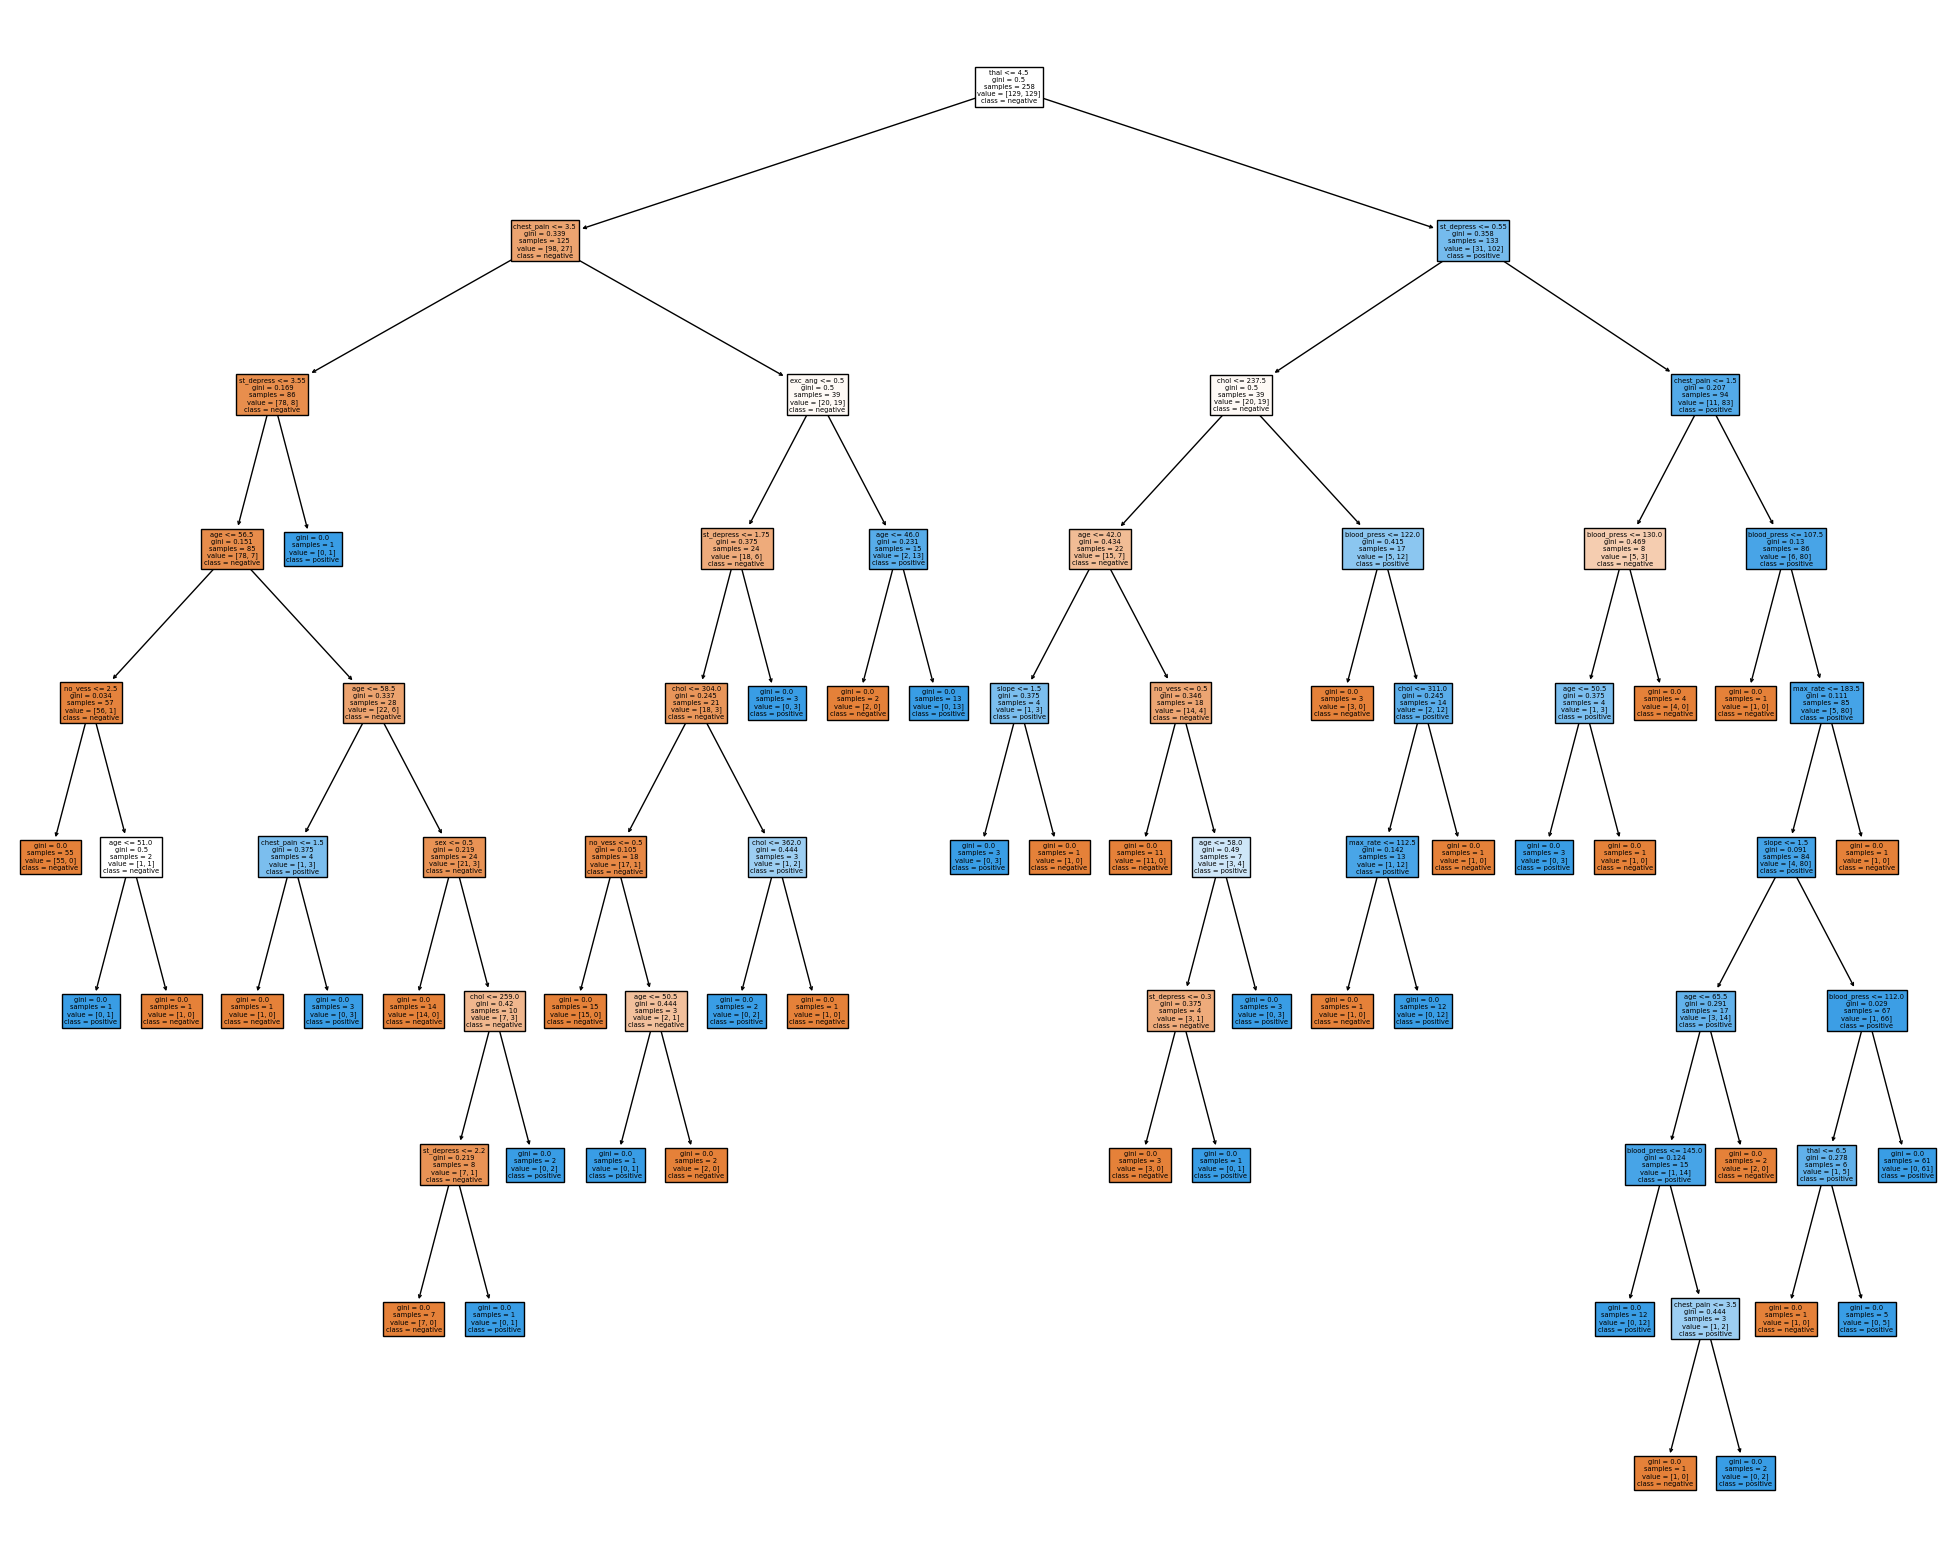

In [ ]:
#@title Decision Tree 4 Visualization

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc4, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

<BarContainer object of 13 artists>

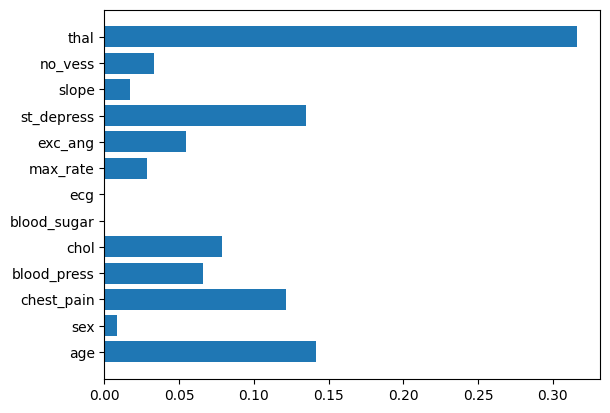

In [71]:
# Feature importances chart
plt.barh(dtc1.feature_names_in_, dtc4.feature_importances_)

In [74]:
#@title Decision Tree 5 - Selected features
# Spliting x axis and y axis

y = df['status']

# Dropping features that were not shown significant in Decision Tree 4
x_new = df.drop(['status','ecg','blood_sugar'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((61, 11), (61,))

In [75]:
# Oversampling is used to balance the unabalanced dataset.

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")


Training target statistics: Counter({1: 129, 0: 129})


In [76]:
# Initializing Decision Tree with ccp_alpha like in DTC4
dtc5 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0)

# Fitting the model
dtc5 = dtc5.fit(x_train,y_train)


In [77]:
#@title Decision Tree 5 Evaluation
y_pred5 = dtc5.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred5)

array([[29,  6],
       [ 7, 19]])

In [78]:
# Accuracy
dtc5_accuracy = metrics.accuracy_score(y_test, y_pred5)

# Precision
dtc5_precision = metrics.precision_score(y_test, y_pred5)

# Recall
dtc5_recall = metrics.recall_score(y_test, y_pred5)

# F1
dtc5_f1 = metrics.f1_score(y_test, y_pred5)

print("DTC1 accuracy: ", dtc5_accuracy,
      "\nDTC1 precision: ", dtc5_precision,
      "\nDTC1 recall: ", dtc5_recall,
      "\nDTC1 F1: ", dtc5_f1)

DTC1 accuracy:  0.7868852459016393 
DTC1 precision:  0.76 
DTC1 recall:  0.7307692307692307 
DTC1 F1:  0.7450980392156863


In [79]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(dtc1_accuracy, dtc2_accuracy, dtc3_accuracy, dtc4_accuracy, dtc5_accuracy),
                    (dtc1_precision, dtc2_precision, dtc3_precision, dtc4_precision, dtc5_precision),
                    (dtc1_recall, dtc2_recall, dtc3_recall, dtc4_recall, dtc5_recall),
                    (dtc1_f1, dtc2_f1, dtc3_f1, dtc4_f1, dtc5_f1)],
           columns=('DT1 (random params)', 'DT2 (default params)', 'DT3 (tuned params)', 'DT4 (default params; pruned)', 'DT5 (selected features, DT4 params)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,DT1 (random params),DT2 (default params),DT3 (tuned params),DT4 (default params; pruned),"DT5 (selected features, DT4 params)"
Accuracy,0.754098,0.770492,0.704918,0.770492,0.786885
Precision,0.703704,0.700000,0.700000,0.700000,0.760000
Recall,0.730769,0.807692,0.538462,0.807692,0.730769
F1,0.716981,0.750000,0.608696,0.750000,0.745098
